# First Custom Pipeline
----

<div class="alert alert-box alert-info">
Please use Jupyter labs http://&lt;board_ip_address&gt;/lab for this notebook.
</div>

This notebook shows your how to create your first custom pipeline

## Aims
* Use Composable object
* Start the HDMI path
* Compose pipeline
* Play with the pipeline

## Table of Contents
* [Download Composable Overlay](#download)
* [Start HDMI Video](#start_hdmi)
* [Let us Compose](#compose)
* [Visualize the Pipeline](#visualize)
* [Play with the LUT IP](#play)
* [Stop HDMI Video](#stop_hdmi)
* [Conclusion](#conclusion)

----

## Revision History

* v1.0 | 30 March 2021 | First notebook revision.
* v1.1 | 11 August 2021 | Update notebook to composable overlay API 1.0.0

----

## Download Composable Overlay <a class="anchor" id="download"></a>

Import the pynq video libraries as well as Composable class and the drivers for the IP.

Download the Composable Overlay using `pynq.Overlay` and grab a handler to the `composable` hierarchy

In [1]:
from pynq import Overlay
from pynq.lib.video import *
from pynq_composable import *

ol = Overlay("cv_dfx_4_pr.bit")

cpipe = ol.composable

## Start HDMI Video <a class="anchor" id="start_hdmi"></a>

Get `VideoStream` object and start video

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to connect HDMI cables to a valid video source and screen may cause the notebook to hang
</div>

In [2]:
video = VideoStream(ol)
video.start()

## Let us Compose <a class="anchor" id="compose"></a>

Grab a handler to the LUT IP object

In [3]:
lut = cpipe.lut_accel

Let us read the documentation on the method `.compose`

In [4]:
cpipe.compose?

Signature: cpipe.compose(cle_list: list) -> None
Docstring:
Configure design to implement required dataflow pipeline

Parameters
----------
cle_list : list
    list of the composable IP objects
    Examples:
    [a, b, c, d] yields

    .. code-block:: none

            -> a -> b -> c -> d ->

    [a, b, [[c,d],[e]], f, g] yields

    .. code-block:: none

                        -> c -> d -
                      /            \
            -> a -> b               f -> g ->
                      \            /
                        ---> e ----
File:      /usr/local/share/pynq-venv/lib/python3.8/site-packages/pynq_composable/composable.py
Type:      method


This method expect a list with the IP object, based on this list the pipeline will be configured on our FPGA. After you run the next cell the video stream on your monitor should change,

In [5]:
video_pipeline = [cpipe.hdmi_source_in, lut, cpipe.hdmi_source_out]

cpipe.compose(video_pipeline)

## Visualize the Pipeline <a class="anchor" id="visualize"></a>

We can visualize the implemented pipeline with the `.graph` attribute. This allows to quickly verify the pipeline

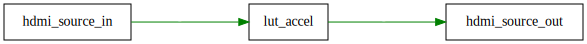

In [6]:
cpipe.graph

## Play with the LUT IP <a class="anchor" id="play"></a>

The LUT is one of the IP available on the static region of the composable overlay, this IP allows further runtime configuration with predefined kernels

The next cell will change the kernel type of the LUT IP every second, you will be able to watch the change on the output video

In [7]:
import time
for i in xvLut:
    lut.kernel_type = i
    time.sleep(0.6)

## Stop HDMI Video <a class="anchor" id="stop_hdmi"></a>

Finally stop the HDMI video pipeline

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to stop the HDMI Video may hang the board 
when trying to download another bitstream onto the FPGA
</div>

In [ ]:
video.stop()
ol.free()

----

## Conclusion <a class="anchor" id="conclusion"></a>

This notebook has shown how to compose a simple pipeline, how to visualize what has been implemented and how to interact with one of the IP objects on the pipeline

[⬅️ Composable Overlay Introduction](01_composable_overlay_intro.ipynb) | | [Introspect Composable Pipeline ➡️](03_introspect_pipeline.ipynb)

Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----